In [1]:
%matplotlib inline 
import os 
if os.path.basename(os.getcwd()) == 'Bosch':
    pass
else:
    %cd ..
    ROOT_DIR = os.getcwd()
    os.path.join(ROOT_DIR)

C:\Users\kusha\OneDrive\Desktop\Bosch


In [2]:
%cd REPO/Real-ESRGAN
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

C:\Users\kusha\OneDrive\Desktop\Bosch\REPO\Real-ESRGAN


running develop
running egg_info
writing realesrgan.egg-info\PKG-INFO
writing dependency_links to realesrgan.egg-info\dependency_links.txt
writing requirements to realesrgan.egg-info\requires.txt


writing top-level names to realesrgan.egg-info\top_level.txt
reading manifest file 'realesrgan.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'realesrgan.egg-info\SOURCES.txt'
running build_ext
Creating c:\users\kusha\anaconda3\envs\ml\lib\site-packages\realesrgan.egg-link (link to .)
realesrgan 0.2.4.0 is already the active version in easy-install.pth

Installed c:\users\kusha\onedrive\desktop\bosch\repo\real-esrgan
Processing dependencies for realesrgan==0.2.4.0
Searching for tqdm==4.62.3
Best match: tqdm 4.62.3
Adding tqdm 4.62.3 to easy-install.pth file
Installing tqdm-script.py script to C:\Users\kusha\anaconda3\envs\ml\Scripts
Installing tqdm.exe script to C:\Users\kusha\anaconda3\envs\ml\Scripts

Using c:\users\kusha\anaconda3\envs\ml\lib\site-packages
Searching for torchvision==0.11.1
Best match: torchvision 0.11.1
Adding torchvision 0.11.1 to easy-install.pth file

Using c:\users\kusha\anaconda3\envs\ml\lib\site-packages
Searching for torch

### Should be in Bosch Directory

In [3]:
%cd {ROOT_DIR}   

C:\Users\kusha\OneDrive\Desktop\Bosch


'touch' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\kusha\OneDrive\Desktop\Bosch
preparing to run on GPU
################################################################################
WORKING ON IMAGE:  lowresshit.jpg
BEFORE ENHANCING IMAGE:
C:\Users\kusha\OneDrive\Desktop\Bosch\REPO\Real-ESRGAN


The syntax of the command is incorrect.


Upsampling 0 lowresshit
Error CUDA out of memory. Tried to allocate 2.08 GiB (GPU 0; 4.00 GiB total capacity; 1.25 GiB already allocated; 789.70 MiB free; 1.59 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
	Tile 1/1
AFTER ENHANCING IMAGE:
<class 'NoneType'>


C:\Users\kusha\anaconda3\envs\ml\lib\site-packages\torch\nn\functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\kusha\OneDrive\Desktop\Bosch\REPO\Real-ESRGAN\inference_realesrgan.py", line 137, in <module>
    main()
  File "C:\Users\kusha\OneDrive\Desktop\Bosch\REPO\Real-ESRGAN\inference_realesrgan.py", line 113, in main
    _, _, output = face_enhancer.enhance(img, has_aligned=False, only_center_face=False, paste_back=True)
  File "C:\Users\kusha\anaconda3\envs\ml\lib\site-packages\torch\autograd\grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "C:\Users\kusha\a

TypeError: Image data of dtype object cannot be converted to float

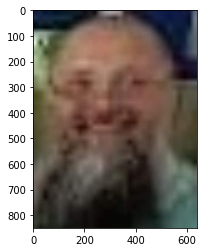

In [4]:
import os
import torch
import cv2
# import json
import numpy as np
import pandas as pd
import time
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch import nn
# from google.colab.patches imporcv2_imshowt 

#video frame capturer
def FrameCapture(video_name):
    vidObj = cv2.VideoCapture(f'{ROOT_DIR}/REPO/data/videos/'+video_name)
    count = 0
    success = 1
    while success:
        success, image = vidObj.read()
        cv2.imwrite(f"{ROOT_DIR}/REPO/data/images/frame%d.jpg" % count, image)
        count += 1


#utils
df=pd.DataFrame(columns=['image','person_id','bbox','age','gender'])
path_to_file=ROOT_DIR + '/REPO/output/bbox_file.txt'
!touch {path_to_file}
big_image_list=[]
big_face_id=[]
big_bbox_list=[]
big_age_list=[]
big_gender_list=[]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
Gender=['Female','Male']
age_class=['0-10','10-20','20-30','30-40','40-50','50-60','60=70','70-80','80-90','90-100']
image_size=128
test_transforms = transforms.Compose([transforms.ToPILImage(),
                                     transforms.Resize((image_size,image_size)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5,0.5,0.5],
                                                          [0.5,0.5,0.5])])


##loading yolo weights
#options available : 5l-face.pt,5m-face,5s-face.pt
weight='5l-face.pt'


#loading age-gender detector
from torchvision.models import resnet50
gender_model=resnet50(pretrained=True)
age_model=resnet50(pretrained=True)

gender_model.fc = nn.Sequential(
    nn.Linear(2048, 100),
    nn.ReLU(),
    nn.Linear(100, 2),
)
age_model.fc = nn.Sequential(
    nn.Linear(2048, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
)

gender_model_path=ROOT_DIR + '/REPO/weights/gender.pth.tar'
age_model_path=ROOT_DIR + '/REPO/weights/age.pth.tar'
%cd {ROOT_DIR}

if device =='cpu':
    print("preparing to run on CPU")
    gender_model.load_state_dict(torch.load(gender_model_path,map_location=torch.device('cpu'))['model_state_dict'])
    age_model.load_state_dict(torch.load(age_model_path,map_location=torch.device('cpu'))['model_state_dict'])
else:
    print("preparing to run on GPU")
    gender_model.load_state_dict(torch.load(gender_model_path)['model_state_dict'])
    age_model.load_state_dict(torch.load(age_model_path)['model_state_dict'])

root_data_path=ROOT_DIR + '/REPO/data'
dataset_path=root_data_path+'/images' ## set path of to-be-tested images
temp_storage=root_data_path+'/temp'
cropped_faces_path=temp_storage+'/faces'
_,_,target_image_files=next(os.walk(dataset_path))

#create a text file to write bboxes
for image_file in target_image_files:#takes 1 image
    !mkdir {cropped_faces_path}
    print("################################################################################")
    print("WORKING ON IMAGE: " ,image_file)
    original_image_file_path=dataset_path+'/'+image_file
    before_image=cv2.imread(original_image_file_path)
    before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
    print("BEFORE ENHANCING IMAGE:")
    plt.imshow(before_image)

    #apply esr-gan
    %cd REPO/Real-ESRGAN
    upsampled_path=temp_storage
    ## if gpu runs out of memory enable the '--tile 1000' argument in the next line
    !python inference_realesrgan.py -n {ROOT_DIR}/REPO/weights/RealESRGAN_x4plus.pth -i {original_image_file_path} -o {upsampled_path} --outscale 3.5  --face_enhance --tile 1000 
    upsampled_image_path=temp_storage+'/'+'sr.jpg'
    upsampled_image=cv2.imread(upsampled_image_path)
    print("AFTER ENHANCING IMAGE:")
    plt.imshow(upsampled_image)
    # break

  # face detector
    %cd {ROOT_DIR}/REPO/yolov5-face/
    !python detect.py --weights REPO/weights/{weight} --image {upsampled_image_path} 

    #iterate over each cropped face
    _,_,cropped_faces =next(os.walk(cropped_faces_path))
    face_id=0
    for cropped_face in cropped_faces:
        a=time.time()
        face_path=cropped_faces_path+'/'+cropped_face
        face=cv2.imread(face_path)
        print("FACE: ",cropped_face)
        plt.imshow(face)

        ## pass on age-gender model
        face = test_transforms(face)
        face = face.unsqueeze(0)
        gender_output = gender_model(face)
        age_output = age_model(face)
        gender_pred = gender_output.cpu().data.max(1, keepdim=True)[1]
        age_pred = age_output.cpu().data.max(1, keepdim=True)[1]
        # print(gender_output)
        # print(age_output)
        gender = gender_pred.detach().cpu().numpy().item()
        age = age_class[age_pred.detach().cpu().numpy().item()]
        b=time.time()
        print("GENDER: ",gender," AGE: ",age)
        print('ESTIMATED IN ',b-a," secs")
        print('----------')

        big_image_list.append(image_file)
        big_face_id.append(face_id)
        face_id+=1
        big_age_list.append(age)
        big_gender_list.append(Gender[gender])
    !rm -r {cropped_faces_path}
  # break

#write in df
df['image']=big_image_list
df['person_id']=big_face_id
df['age']=big_age_list
df['gender']=big_gender_list

with open(path_to_file) as topo_file:
    for line in topo_file:
        big_bbox_list.append(line)

##saving as csv
df.to_csv(f'{ROOT_DIR}/REPO/output/output.csv')